PART 3

In [2]:
# Python SQL toolkit and Object Relational Mapper
#Importing Dependencies

import matplotlib

import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc

In [5]:
# Create engine using the `hawaii_9.sqlite` database file
engine = create_engine("sqlite:///hawaii_9.sqlite", echo=False)

In [6]:

Base = automap_base()

In [7]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [8]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [9]:
Measurement = Base.classes.measurement

In [10]:
Station = Base.classes.station

### Precipitation Analysis

In [11]:
session = Session(engine)

In [202]:
# Extracting the latest date and one year prior date

from sqlalchemy import func

import numpy as np

import datetime as dt

end_date = session.query(Measurement.Date).order_by(Measurement.Date.desc()).first()

end_date = np.array(end_date, dtype=np.datetime64)

print (end_date[0])

start_date = end_date -365

start_date_str = str(start_date[0])

print (start_date_str)


2017-08-23
2016-08-23


In [223]:
#extracting the results of 1 year of precipitation data

pcpt_results = session.query(Measurement.Date,Measurement.Precipitation ). filter(Measurement.Date > start_date_str).all()

print (pcpt_results)


[('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', 0.03), ('2016-09-06', 0.03), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 0.0), ('2016-10-09', 

In [242]:
#Converting the annual precipitation data into a dataframe

df = pd.DataFrame(pcpt_results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

df_2 = df.head(20)

df.reset_index(inplace=True)

df.head()

,date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [270]:
#extracting month from the date column to plot

df['months'] = pd.to_datetime(df['date'])


df['month'] = df.months.dt.month

df.head()

,date,precipitation,months,month
0,2016-08-24,0.08,2016-08-24,8
1,2016-08-25,0.08,2016-08-25,8
2,2016-08-26,0.00,2016-08-26,8
3,2016-08-27,0.00,2016-08-27,8
4,2016-08-28,0.01,2016-08-28,8


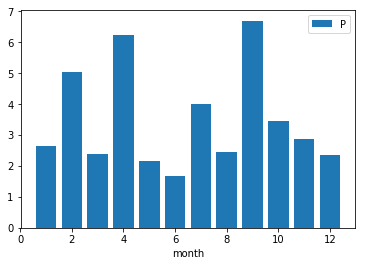

In [299]:
#plotting the graph

plt.bar(df['month'],df['precipitation'])

plt.xlabel("month")

plt.legend("Precipitation")


In [15]:
# Description of the results

df.describe()

,precipitation
count,2223.000000
mean,0.166334
std,0.443901
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,6.700000


# Station Analysis

In [19]:
from sqlalchemy import func

#Total number of stations
   
total_Stations = session.query(func.count(Station.Station)).all()

print (f"Total number of stations: {total_Stations[0][0]}")

Total number of stations: 9


In [43]:
#name of the stations and the number of records for each station

session.query(Measurement.Station,func.count(Measurement.Station)).\
group_by(Measurement.Station).\
order_by(func.count(Measurement.Station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
#getting the most active station

most_active_station = session.query(Measurement.Station,func.count(Measurement.Station)).\
group_by(Measurement.Station).\
order_by(func.count(Measurement.Station).desc()).first()

print (most_active_station)

('USC00519281', 2772)


# Station USCOO519281 HAS THE HIGHEST RECORDS

In [49]:
#getting number of observations for each station in the most recent year 

session.query(Measurement.Station, Measurement.Date,func.count(Measurement.Temperature) ).\
filter(Measurement.Date > '2016-07-31').\
filter(Measurement.Date < '2017-07-31').\
group_by(Measurement.Station).\
order_by(func.count(Measurement.Temperature).desc()).all()

[('USC00513117', '2017-07-30', 364),
 ('USC00519281', '2017-07-30', 364),
 ('USC00519397', '2017-07-30', 361),
 ('USC00516128', '2017-07-30', 348),
 ('USC00519523', '2017-07-30', 339),
 ('USC00514830', '2017-07-29', 302),
 ('USC00517948', '2017-07-28', 196)]

In [73]:
import numpy as np
from datetime import timedelta


data = session.query(Measurement.Temperature). filter(Measurement.Date > '2016-07-31'). \
filter(Measurement.Date < '2017-07-31').all()

print(np.min(data))

date2 =  start_date - timedelta(days = 365)

print (date2)

58
2015-08-24 00:00:00


In [50]:
#extracting the annual data for most active station

Annual_data = session.query(Measurement.Date, Measurement.Temperature ). filter(Measurement.Date > '2016-07-31'). \
filter(Measurement.Date < '2017-07-31').filter(Measurement.Station == 'USC00513117').all()

In [51]:
#converting to a dataframe to plot

data_to_be_plotted = pd.DataFrame(Annual_data)

In [52]:

data_to_be_plotted

,Date,Temperature
0,2016-08-01,76
1,2016-08-02,75
2,2016-08-03,76
3,2016-08-04,76
4,2016-08-05,78
5,2016-08-06,76
6,2016-08-07,77
7,2016-08-08,78
8,2016-08-09,77
9,2016-08-10,78


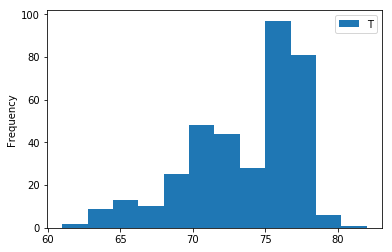

In [221]:
#graph plotting

plt.hist(data_to_be_plotted['Temperature'], bins = 12)

plt.ylabel("Frequency")

plt.legend('Temperature')


# Temperature Analysis

The average temperature is : 74.25443786982248, The max temperature is : 84, The minimum temperature is : 59
2015-07-01
2016-04-23
For Previous Year : The average temperature was : 74.73931711306481,    The max temperature was : 87,    The minimum temperature was : 56


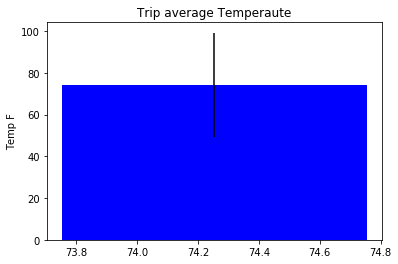

In [175]:
import numpy as np



def calc_temps(start_date1, end_date1):
    data = session.query(Measurement.Temperature). filter(Measurement.Date > start_date1). \
    filter(Measurement.Date < end_date1).all()
    
    mean = np.mean(data)
    max = np.max(data)
    min = np.min(data) 
    
    
    print (f"The average temperature is : {mean}, The max temperature is : {max}, The minimum temperature is : {min}")
    
    #calculating previous year dates
    start_date1 = np.array(start_date1, dtype=np.datetime64)
    start_date_previous_year = start_date1 -365
    
    print (start_date_previous_year)
   
    start_date_previous_year_str = str(start_date_previous_year)
    
    end_date1 = np.array(end_date1, dtype=np.datetime64)
    end_date_previous_year = end_date1 -365
    
    print (end_date_previous_year)
    
    data_previous_years = session.query(Measurement.Temperature).\
    filter(Measurement.Date > start_date_previous_year_str).\
    filter(Measurement.Date < end_date_previous_year).all()
    
    
    mean_previous_year = np.mean(data_previous_years)
    max_previous_year = np.max(data_previous_years)
    min_previous_year = np.min(data_previous_years) 
    
    
    
    print (f"For Previous Year : The average temperature was : {mean_previous_year},\
    The max temperature was : {max_previous_year},\
    The minimum temperature was : {min_previous_year}")
    
    #Average Graph Plotting steps
    plt.bar( mean, mean, width = 1, yerr= (max - min), color='blue')
    plt.ylabel("Temp F")
    plt.title("Trip average Temperaute")

calc_temps('2016-06-30', '2017-04-23')

